In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('pakistan_business_development_jobs_2025.csv.csv')

In [12]:
df.head()

,Unnamed: 0,Job,Company,Salary,Location,Posted on,Experience
0,0,IT Assistant,"HR First Pvt,",NaN,Clifton,"Aug 07, 2025",2 Years
1,1,Factory Manager - Rice Processing Unit (Port Q...,"Fulcrum Pvt,",300K - 300K,Karachi,"Aug 07, 2025",3 Years
2,2,Packing & Inventory Supervisor,"Babji Manufacturing,",43K - 43K,Karachi,"Aug 07, 2025",3 Years
3,3,Midlevel React Js Developer,"HR Ways,",120K - 120K,Lahore,"Aug 07, 2025",2 Years
4,4,Brand designer,"SalesSearch,",50K - 50K,", Pakistan","Aug 07, 2025",3 Years


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7680 non-null   int64 
 1   Job         7680 non-null   object
 2   Company     7680 non-null   object
 3   Salary      3929 non-null   object
 4   Location    7680 non-null   object
 5   Posted on   7680 non-null   object
 6   Experience  7680 non-null   object
dtypes: int64(1), object(6)
memory usage: 420.1+ KB


In [16]:
df.describe()

,Unnamed: 0
count,7680.000000
mean,3839.500000
std,2217.169367
min,0.000000
25%,1919.750000
50%,3839.500000
75%,5759.250000
max,7679.000000


In [18]:
df.shape

(7680, 7)

In [20]:
df.columns

Index(['Unnamed: 0', 'Job', 'Company', 'Salary', 'Location', 'Posted on',
       'Experience'],
      dtype='object')

In [22]:
df.dtypes

Unnamed: 0     int64
Job           object
Company       object
Salary        object
Location      object
Posted on     object
Experience    object
dtype: object

In [24]:
df.isnull().sum()

Unnamed: 0       0
Job              0
Company          0
Salary        3751
Location         0
Posted on        0
Experience       0
dtype: int64

In [26]:
df = df.drop(columns=['Unnamed: 0'])

In [28]:
df.head()

,Job,Company,Salary,Location,Posted on,Experience
0,IT Assistant,"HR First Pvt,",NaN,Clifton,"Aug 07, 2025",2 Years
1,Factory Manager - Rice Processing Unit (Port Q...,"Fulcrum Pvt,",300K - 300K,Karachi,"Aug 07, 2025",3 Years
2,Packing & Inventory Supervisor,"Babji Manufacturing,",43K - 43K,Karachi,"Aug 07, 2025",3 Years
3,Midlevel React Js Developer,"HR Ways,",120K - 120K,Lahore,"Aug 07, 2025",2 Years
4,Brand designer,"SalesSearch,",50K - 50K,", Pakistan","Aug 07, 2025",3 Years


In [32]:
# Convert Salary to numeric values (e.g., "300K" -> 300000)
def parse_salary(s):
    if pd.isna(s): 
        return np.nan
    parts = s.replace(",", "").split()
    for part in parts:
        if "K" in part.upper():
            try:
                return float(part.upper().replace("K","")) * 1000
            except:
                return np.nan
    return np.nan

df['Salary_num'] = df['Salary'].apply(parse_salary)

In [34]:
df.head()

,Job,Company,Salary,Location,Posted on,Experience,Salary_num
0,IT Assistant,"HR First Pvt,",NaN,Clifton,"Aug 07, 2025",2 Years,NaN
1,Factory Manager - Rice Processing Unit (Port Q...,"Fulcrum Pvt,",300K - 300K,Karachi,"Aug 07, 2025",3 Years,300000.0
2,Packing & Inventory Supervisor,"Babji Manufacturing,",43K - 43K,Karachi,"Aug 07, 2025",3 Years,43000.0
3,Midlevel React Js Developer,"HR Ways,",120K - 120K,Lahore,"Aug 07, 2025",2 Years,120000.0
4,Brand designer,"SalesSearch,",50K - 50K,", Pakistan","Aug 07, 2025",3 Years,50000.0


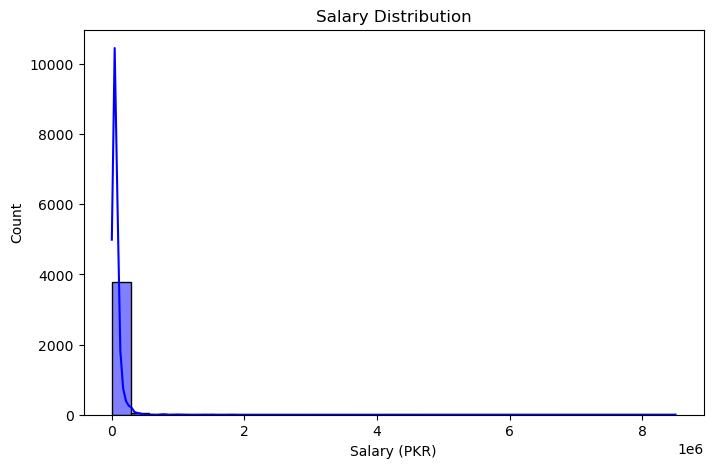

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary_num'].dropna(), bins=30, kde=True, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary (PKR)')
plt.ylabel('Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16236\623047112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


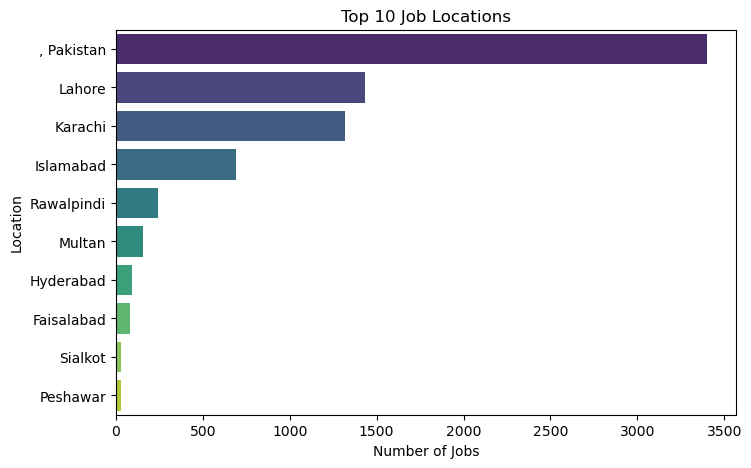

In [38]:
plt.figure(figsize=(8,5))
top_locations = df['Location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16236\116362834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_counts.values, y=exp_counts.index, palette="magma")


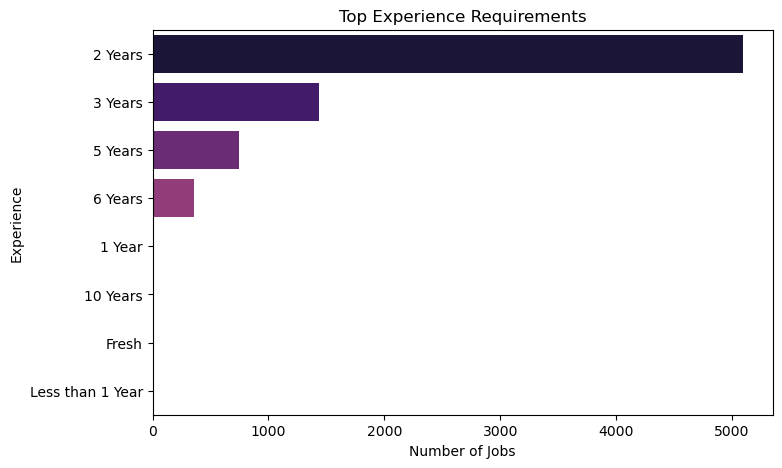

In [40]:
plt.figure(figsize=(8,5))
exp_counts = df['Experience'].value_counts().head(10)
sns.barplot(x=exp_counts.values, y=exp_counts.index, palette="magma")
plt.title('Top Experience Requirements')
plt.xlabel('Number of Jobs')
plt.ylabel('Experience')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16236\716451026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Salary_num', data=df_top, palette='coolwarm')


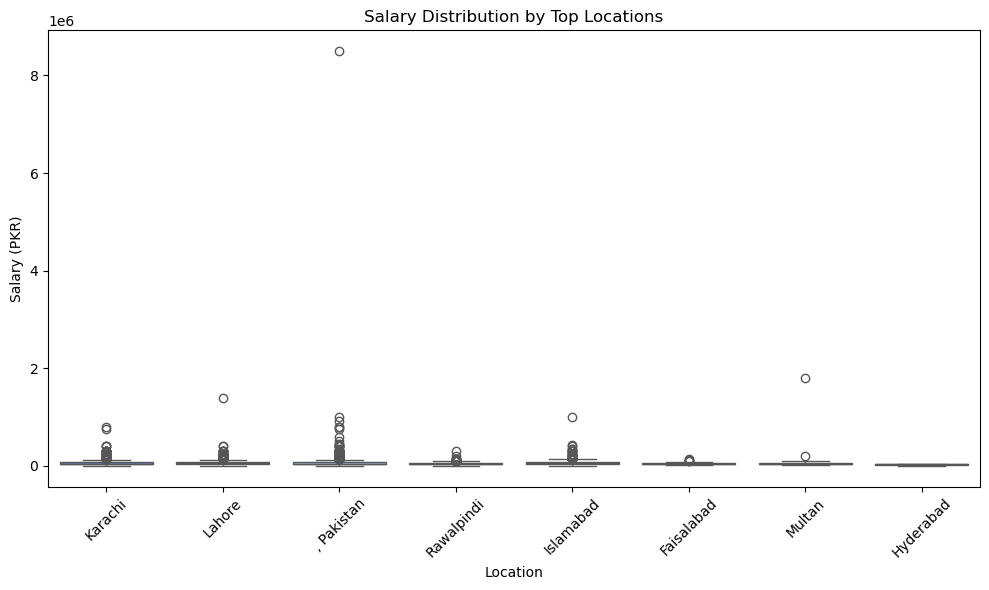

In [42]:
# Filter top locations
top_locations = df['Location'].value_counts().head(8).index
df_top = df[df['Location'].isin(top_locations)]

plt.figure(figsize=(10,6))
sns.boxplot(x='Location', y='Salary_num', data=df_top, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Top Locations')
plt.xlabel('Location')
plt.ylabel('Salary (PKR)')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16236\4137829778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='viridis')


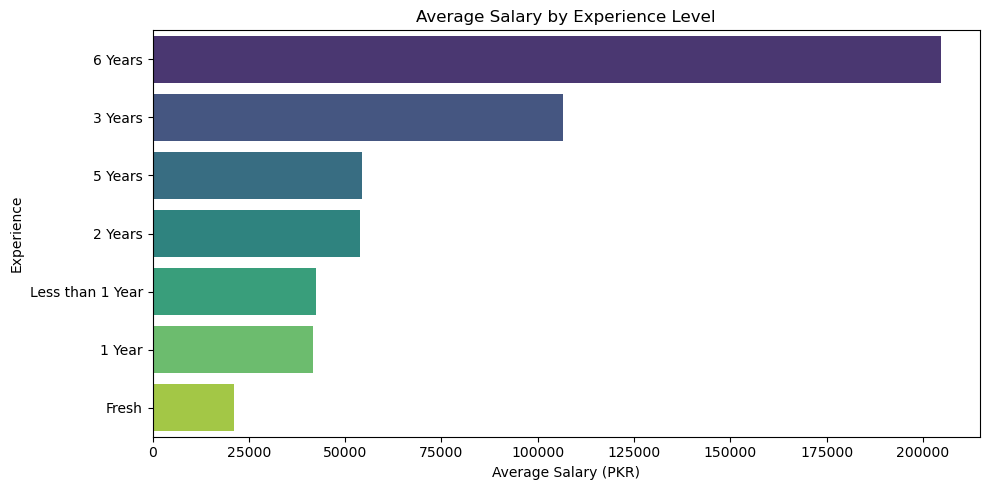

In [44]:
# Calculate average salary per experience level
avg_salary = df.groupby('Experience')['Salary_num'].mean().dropna().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Average Salary (PKR)')
plt.ylabel('Experience')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16236\128144198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='cubehelix')


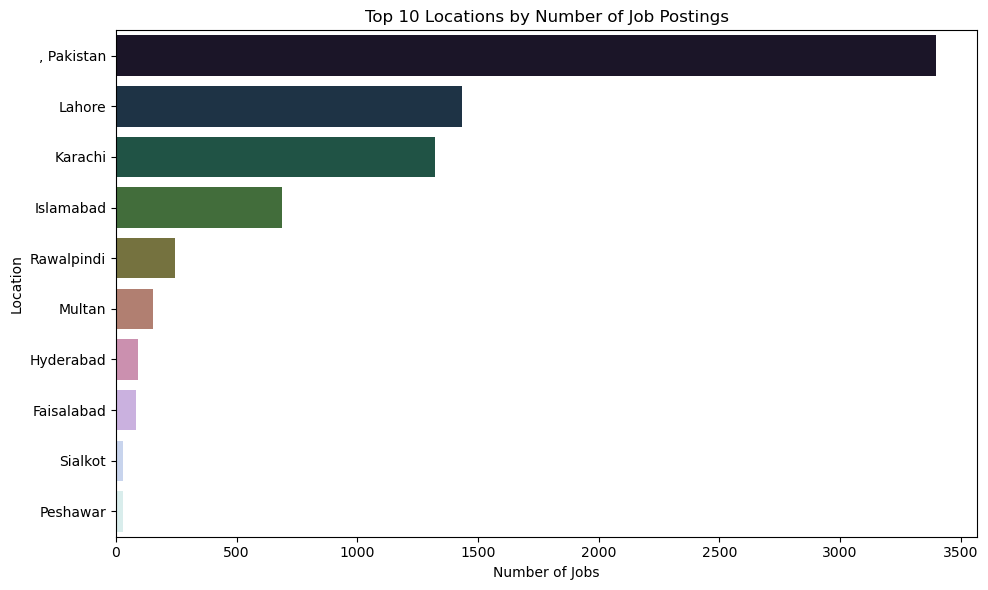

In [48]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='cubehelix')
plt.title('Top 10 Locations by Number of Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()